# Quantum Harmonic Oscillator Energy Spectrum

### James Saslow

### 12/6/2024

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import hermite
from math import factorial

# The Characteristic Length

Here, we encode our characteristic length of the Quantum Harmonic Oscillator (QHO)

$\alpha = \sqrt{\hbar / (m \omega)}$

In [8]:
m     = 1
hbar  = 1
omega = 2

alpha = np.sqrt(hbar / (m*omega))


# QHO Eigenfunctions

Next, we write a function to return the nth eigenfunction of the QHO defined in some position domain

$\psi_{n}(x) = e^{-x^{2} / (2\alpha^{2})} \frac{H_{n}(x / \alpha)}{\sqrt{\alpha 2^{n} n! \sqrt{\pi}}}$

In [9]:
def psi(x,n):
    '''
    Description: 
        - The nth energy wavefunction of the quantum harmonic oscillator
    Params:
        - x : A numpy array spaning the position domain
        - n : Integer, the oscillator mode
    
    '''
    Hn = hermite(n)  # nth Hermite Polynomial
    f1 = np.exp(-x**2 / (2*alpha ** 2))
    f2 = Hn(x/alpha)
    f3 = np.sqrt( alpha * (2**n) * factorial(n) *np.sqrt(np.pi) )
    f  = f1*f2 / f3

    return f


# QHO Eigenenergy

The QHO energy spectrum is given by

$\varepsilon_{n} = \hbar \omega (n + \frac{1}{2})$

In [10]:
def energy(n):
    '''
    Description:
        - The nth eigenenergy of the harmonic oscillator
    Params:
        - n : Integer, the oscillator mode
    '''
    return hbar*omega * (n + 1/2)    



# QHO Potential Well

The QHO potential well is given by

$V(x) = \frac{1}{2}m \omega^{2} x^{2}$

In [ ]:
def V(x):
    '''
    Description:
        - Returns the potential landscape of the harmonic oscillator
    '''

    return 0.5*m*(omega**2)*x**2

# Plotting the Energy Spectrum

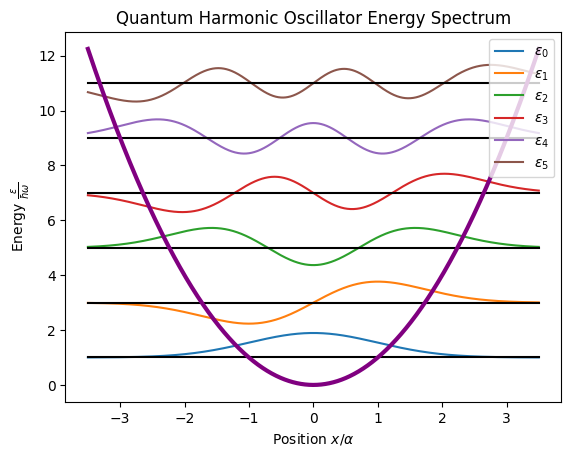

In [15]:
x_lim = 3.5
x_normalized = np.linspace(-x_lim,x_lim,1000) # Position Domain
x = alpha*x_normalized     # Normalized Position

number_of_modes = 6


for i in range(number_of_modes):
    E = energy(i)
    y = psi(x,i) + E

    plt.plot(x_normalized,y, label = '$\\epsilon_{' + str(i) + '}$')
    plt.plot(x_normalized, np.ones((len(x))) * E  , color = 'black')

plt.plot(x_normalized, V(x), color = 'purple', lw = 3)

plt.title('Quantum Harmonic Oscillator Energy Spectrum')
plt.xlabel('Position $x / \\alpha$')
plt.ylabel('Energy $\\frac{\epsilon}{\hbar \omega}$')
plt.legend(loc = 'upper right')

plt.show()
